In [2]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import os



In [3]:
def read_wav_file(filename):
    with wave.open(filename, 'rb') as wf:
        params = wf.getparams()
        num_channels, sampwidth, framerate, num_frames = params[:4]
        frames = wf.readframes(num_frames)
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, params

def plot_waveform(waveform, framerate):
    # Create a time array in seconds
    time_array = np.arange(0, len(waveform)) / framerate
    plt.figure(figsize=(15, 5))
    plt.plot(time_array, waveform, label="Waveform")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.legend()
    plt.show()

def read_files_in_dir(directory):
    filenames = os.listdir(directory)
    return filenames


def pick_5_samples(arrays):
    instruments = []
    for array in arrays:
        pick = np.random.choice(array, 1)
        instruments.append(pick)
    return instruments

#read the filenames, and add their data to 5 lists
def add_waveform_to_list(filenames):
    waveforms = []
    for filename in filenames:
        waveform, params = read_wav_file("./audio/" + filename[0])
        waveforms.append(waveform)
    return waveforms
        

#Sorting the files in directory

filenames = read_files_in_dir("./audio")
#pianos = [filename for filename in filenames if "piano" in filename] #empty
bass = [filename for filename in filenames if "bass" in filename]
guitar = [filename for filename in filenames if "guitar" in filename]
#drum = [filename for filename in filenames if "drum" in filename] #empty
flutes = [filename for filename in filenames if "flute" in filename]
keyboards = [filename for filename in filenames if "keyboard" in filename]


In [11]:
#Pick a random sample from each instrument list
waveforms = add_waveform_to_list(pick_5_samples([bass, guitar, flutes, keyboards]))




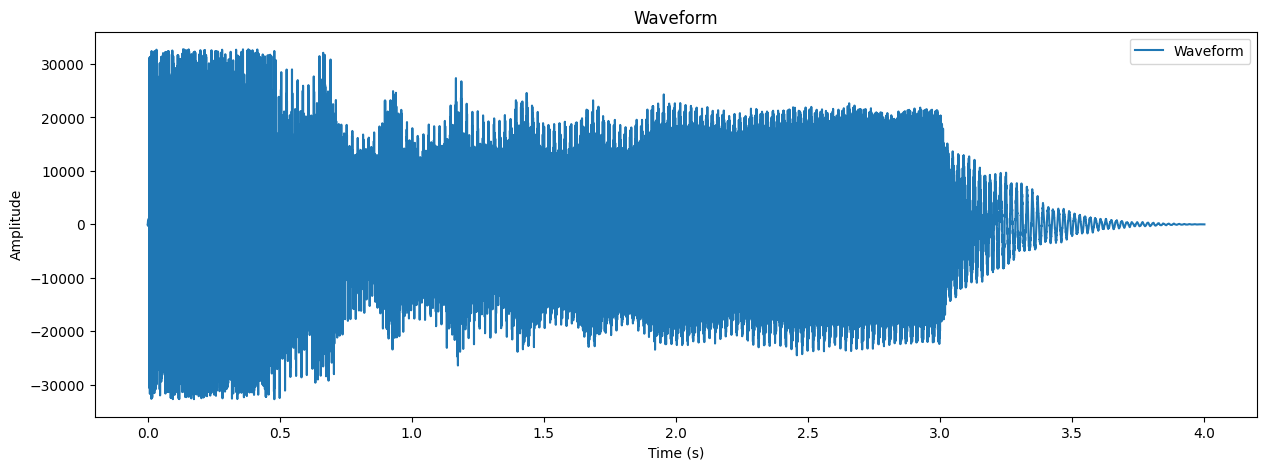

In [30]:
#Combine in a single list
combo = waveforms[0] + waveforms[1] + waveforms[2] + waveforms[3]

sam_rate = 16000

plot_waveform(combo, sam_rate)

In [28]:
#Write to new file
from scipy.io.wavfile import write

combo = waveforms[0] + waveforms[1] + waveforms[2] + waveforms[3]

sam_rate = 16000

write("combo.wav", sam_rate, combo)